In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [8]:
y.shape, tx.shape

array([[ 1.        ,  1.94406149],
       [ 1.        ,  0.62753668],
       [ 1.        ,  2.01244346],
       ...,
       [ 1.        , -0.64968792],
       [ 1.        ,  0.69312469],
       [ 1.        , -1.14970831]])

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [38]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    factor = np.sqrt(1./ len(y))
    e = factor * ( y - np.dot(tx, w) )
    return e.T @ e 
w = np.array([1,1])
compute_loss(y, tx, w)

5412.926156644146

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


# 2 Grid Search

Fill in the function `grid_search()` below:

In [41]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
#     weights_combinations = np.array(np.meshgrid([1, 2, 3], [4, 5, 6])).reshape(2, -1).T
    losses = np.zeros((len(w0), len(w1)))

    for iw0, w0_ in enumerate(w0):
        for  iw1, w1_ in enumerate(w1):
            losses[iw0, iw1] = compute_loss(y, tx, (w0_,  w1_))
    return losses

# w0s = np.arange(-1, 1, 0.1)
# w1s = np.arange(-1, 1, 0.1)
# grid_losses = grid_search(y, tx, w0s, w1s)

Let us play with the grid search demo now!

Grid Search: loss*=31.117406737219053, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.626 seconds


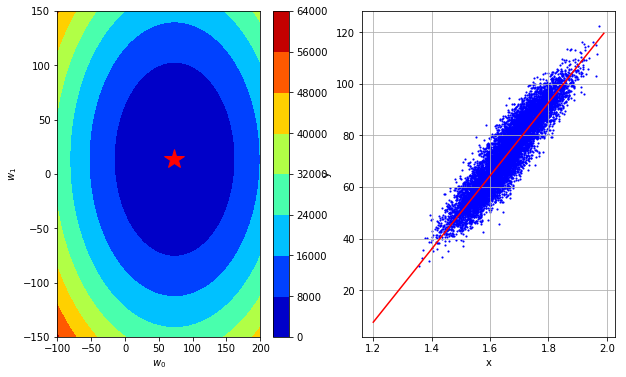

In [45]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [76]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    factor = 1.0 / len(y)
    e = factor * ( y - np.dot(tx, w) )
    return - np.dot(tx.T, e)

compute_gradient(y, tx, (72.73, 13.48))

array([-5.63922002e-01,  2.87565011e-04])

Please fill in the functions `gradient_descent` below:

In [106]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, eps=0.0001):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    last_loss = np.inf
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_gradient(y,tx, w)
        w = w - gamma*grad

        ws.append(w)
        losses.append(loss)
        if last_loss - loss  <  eps:
            print("Convergence threshold eps={} was reached".format(eps))
            break
        last_loss = loss
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses,ws
losses, ws  = gradient_descent(y,tx, (0,1), 100,  0.4, 0.1)
ws

Gradient Descent(0/99): loss=5558.514000648354, w0=29.317568800842054, w1=5.991884973995566
Gradient Descent(1/99): loss=2020.7589767055133, w0=46.90811008134732, w1=8.987015958392934
Gradient Descent(2/99): loss=747.167168086086, w0=57.462434849650464, w1=10.784094549031368
Gradient Descent(3/99): loss=288.67411698309263, w0=63.79502971063236, w1=11.862341703414433
Gradient Descent(4/99): loss=123.61661858601488, w0=67.59458662722149, w1=12.509289996044277
Gradient Descent(5/99): loss=64.19591916306706, w0=69.87432077717497, w1=12.897458971622184
Gradient Descent(6/99): loss=42.80446737080575, w0=71.24216126714705, w1=13.130360356968929
Gradient Descent(7/99): loss=35.10354472559173, w0=72.06286556113031, w1=13.270101188176975
Gradient Descent(8/99): loss=32.331212573314644, w0=72.55528813752026, w1=13.353945686901804
Gradient Descent(9/99): loss=31.333172998494906, w0=72.85074168335423, w1=13.404252386136701
Gradient Descent(10/99): loss=30.973878751559806, w0=73.02801381085462, w1=1

[(0, 1),
 array([29.3175688 ,  5.99188497]),
 array([46.90811008,  8.98701596]),
 array([57.46243485, 10.78409455]),
 array([63.79502971, 11.8623417 ]),
 array([67.59458663, 12.50929   ]),
 array([69.87432078, 12.89745897]),
 array([71.24216127, 13.13036036]),
 array([72.06286556, 13.27010119]),
 array([72.55528814, 13.35394569]),
 array([72.85074168, 13.40425239]),
 array([73.02801381, 13.43443641]),
 array([73.13437709, 13.45254682]),
 array([73.19819505, 13.46341306])]

Test your gradient descent function through gradient descent demo shown below:

In [109]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.6

# Initialization
w_initial = np.array([100.0, -101.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=13849.590936965102, w0=83.97635320126304, w1=-32.31217253900654
Gradient Descent(1/499): loss=2241.7828415340446, w0=77.56689448176827, w1=-4.837041554609176
Gradient Descent(2/499): loss=384.5335462650796, w0=75.00311099397041, w1=6.153010839149763
Gradient Descent(3/499): loss=87.37365902204607, w0=73.97759759885128, w1=10.549031796653335
Gradient Descent(4/499): loss=39.82807706316075, w0=73.56739224080363, w1=12.307440179654762
Gradient Descent(5/499): loss=32.22078394973912, w0=73.40331009758457, w1=13.010803532855334
Gradient Descent(6/499): loss=31.003617051591654, w0=73.33767724029694, w1=13.292148874135563
Gradient Descent(7/499): loss=30.808870347888053, w0=73.31142409738189, w1=13.404687010647654
Gradient Descent(8/499): loss=30.777710875295483, w0=73.30092284021588, w1=13.44970226525249
Gradient Descent(9/499): loss=30.77272535968067, w0=73.29672233734946, w1=13.467708367094426
Gradient Descent(10/499): loss=30.771927677182298, w0=73.2950421362

<function __main__.plot_figure>

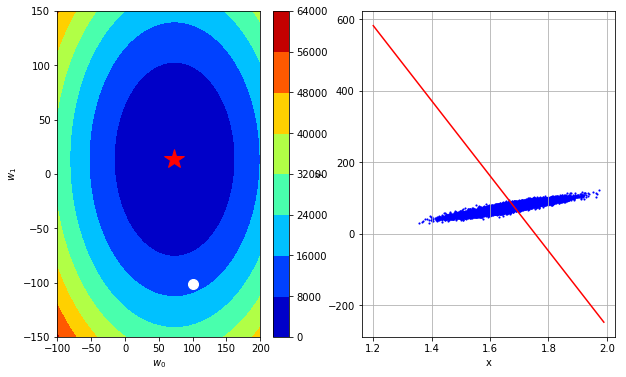

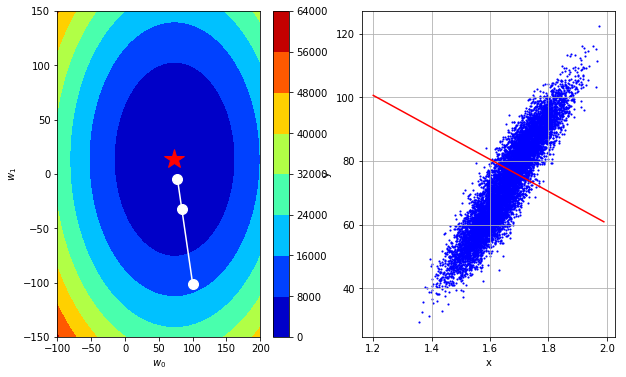

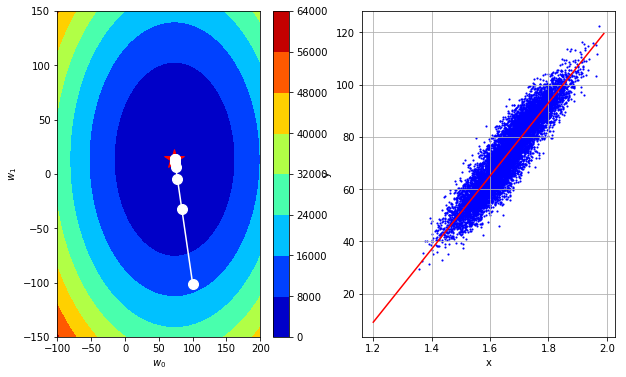

In [110]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [145]:
def compute_stoch_gradient(y, tx, w, batch_size):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    y_batch, tx_batch = list(batch_iter(y, tx, batch_size, num_batches=1, shuffle=True))[0]
    factor = 1.0 / len(y_batch)
    e = factor * ( y_batch - np.dot(tx_batch, w) )
    return - np.dot(tx_batch.T, e)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma,  eps=1e-8):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    last_loss = np.inf
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        grad = compute_stoch_gradient(y,tx, w, batch_size)
        w = w - gamma*grad

        ws.append(w)
        losses.append(loss)
        if np.abs(last_loss - loss)  <  eps:
            print("Convergence threshold eps={} was reached".format(eps))
            break
        last_loss = loss
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


In [149]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 200

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518335, w0=51.05717970156579, w1=6.9756008354910115
Gradient Descent(1/49): loss=567.5479515769816, w0=66.37241373713537, w1=11.3534343641943
Gradient Descent(2/49): loss=83.20011083404685, w0=71.3283675157146, w1=12.943743615421484
Gradient Descent(3/49): loss=34.9224427521776, w0=72.63550256680993, w1=13.001493566746095
Gradient Descent(4/49): loss=31.43398517637689, w0=72.44356706143766, w1=13.66224519485686
Gradient Descent(5/49): loss=31.528197471201434, w0=73.11119292555297, w1=13.41229871821737
Gradient Descent(6/49): loss=30.809710262285392, w0=73.56228115606214, w1=13.61439335661425
Gradient Descent(7/49): loss=30.8619313238211, w0=72.99510307185678, w1=12.98137715407341
Gradient Descent(8/49): loss=31.109406542938874, w0=73.05821269627822, w1=12.90080874346396
Gradient Descent(9/49): loss=31.162464098573622, w0=73.36694797417344, w1=13.401031497578836
Gradient Descent(10/49): loss=30.783299220167066, w0=73.69261089531132, w1=13.43966122

<function __main__.plot_figure>

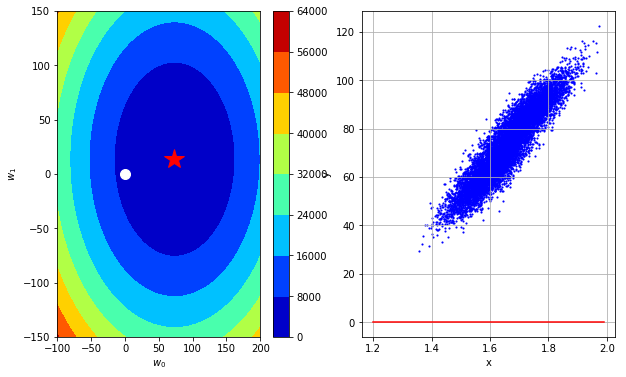

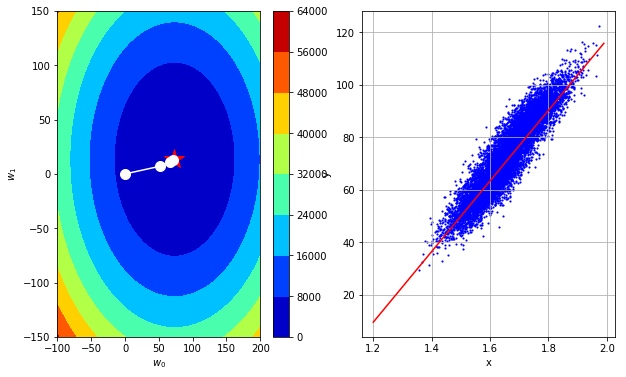

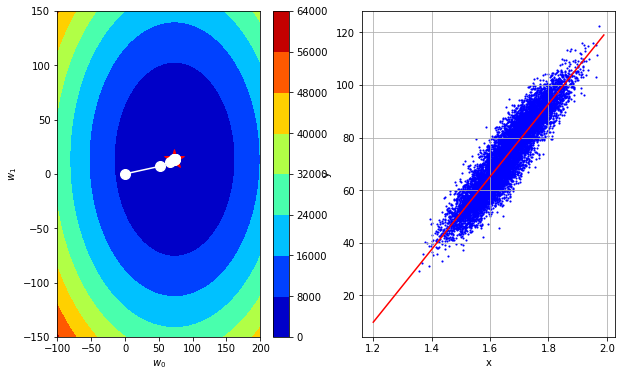

In [151]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)